## Import relevant libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(print_changed_only=False)

## Load the data

In [106]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## eyeball the data

In [107]:
df1=df.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [109]:
## we see that the data doesn't have null values

In [110]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Preprocessing and Cleaning

In [111]:
## make a new column 'wine_quality' where we map the values of quality as 1 or 0...we would like to assume that -
## - quality better than or equal to 7 is good i.e. 1 and quality less than that is not upto the marks i.e. 0
df1['wine_quality']=np.where(df1['quality']>=7,1,0)

In [112]:
df1.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [113]:
# check if dataset is balanced (what % of targets are 1s)
# targets.sum() will give us the number of 1s that there are
# the shape[0] will give us the length of the targets array
df1.wine_quality.sum()/df1.shape[0]

0.1357098186366479

In [114]:
df1.wine_quality.sum()

217

In [115]:
df1.shape

(1599, 13)

In [116]:
##data is imbalanced as only 217 values are from class of 1s and others from class of 0s

<AxesSubplot:xlabel='wine_quality', ylabel='count'>

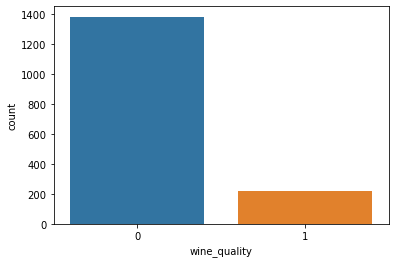

In [117]:
##let's plot the countplot to visualize this abnormality better 
sns.countplot(data=df1,x='wine_quality')

<AxesSubplot:xlabel='quality', ylabel='count'>

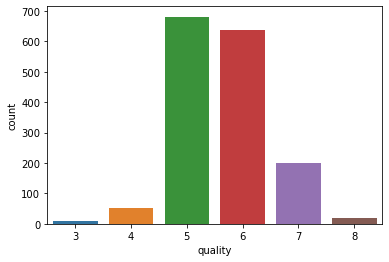

In [118]:
sns.countplot(data=df1,x='quality')

In [119]:
## we can drop the 'quality' column  as we have created another feature for our target variable
df1.drop('quality',axis=1,inplace=True)

## EDA

<AxesSubplot:>

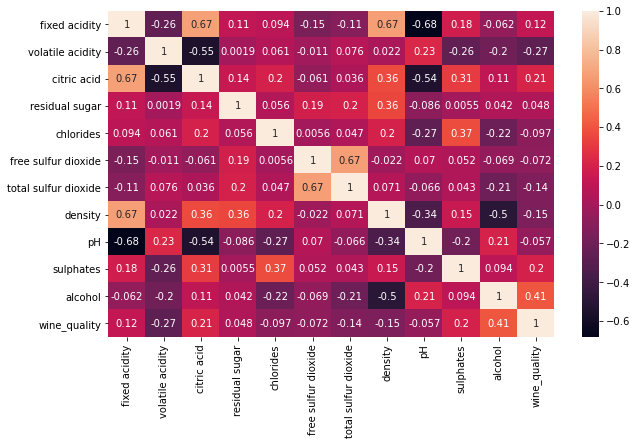

In [120]:
## to check the correlation of variables with one another and with the target variable
plt.figure(figsize = (10, 6))
sns.heatmap(df1.corr(), annot = True)

In [121]:
## we see that wine quality is highly correlated with the alcohol

# Define our targets and inputs

In [122]:

x=df1.drop(['wine_quality'],axis=1)
y=df1['wine_quality']

# create test and train dataset

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=500)

In [125]:
print(x_train.shape,y_train.shape)

(1279, 11) (1279,)


In [126]:
print(x_test.shape,y_test.shape)

(320, 11) (320,)


# import the model and fit on training dataset

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rfc=RandomForestClassifier()

In [129]:
print(rfc.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [130]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
## let's predict  the values on test dataset
y_pred=rfc.predict(x_test)

## check the accuracy of the model

In [132]:
from sklearn import metrics

In [133]:
metrics.accuracy_score(y_test,y_pred)

0.89375

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[267   6]
 [ 28  19]]


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       273
           1       0.76      0.40      0.53        47

    accuracy                           0.89       320
   macro avg       0.83      0.69      0.73       320
weighted avg       0.88      0.89      0.88       320



## let's use K-fold validation

In [136]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [137]:
scores = cross_val_score(rfc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [138]:
scores

array([0.93125   , 0.93125   , 0.91875   , 0.9       , 0.925     ,
       0.89375   , 0.9       , 0.9       , 0.9375    , 0.93081761,
       0.89375   , 0.91875   , 0.88125   , 0.9125    , 0.93125   ,
       0.90625   , 0.95      , 0.90625   , 0.91875   , 0.94968553,
       0.91875   , 0.93125   , 0.875     , 0.93125   , 0.925     ,
       0.94375   , 0.8875    , 0.925     , 0.9375    , 0.88679245])

In [139]:
scores.mean() ## our mean accuracy

0.9166181865828094

## as we saw that the dataset was imbalanced we can balance it with SMOTE

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
oversample=SMOTE()

In [142]:
x,y=oversample.fit_resample(x,y)

In [143]:
y.sum()

1382

In [144]:
y.shape

(2764,)

In [145]:
x.shape

(2764, 11)

In [146]:
y.sum()/y.shape[0]

0.5

In [147]:
## now we see that the dataset is balanced

## now we re run all the commands to see if our model performed better

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=400)

In [149]:
print(x_train.shape,y_train.shape)

(2211, 11) (2211,)


In [150]:
print(x_test.shape,y_test.shape)

(553, 11) (553,)


In [151]:
rfc=RandomForestClassifier()

In [152]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
y_pred=rfc.predict(x_test)

In [154]:
metrics.accuracy_score(y_test,y_pred)

0.9511754068716094

In [155]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[242  16]
 [ 11 284]]


In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       258
           1       0.95      0.96      0.95       295

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



In [157]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores

array([0.94584838, 0.94584838, 0.94223827, 0.92057762, 0.94565217,
       0.96014493, 0.9384058 , 0.94565217, 0.92753623, 0.94202899,
       0.93140794, 0.97833935, 0.9566787 , 0.90252708, 0.9384058 ,
       0.9673913 , 0.9384058 , 0.93478261, 0.94202899, 0.93478261,
       0.92779783, 0.92779783, 0.96028881, 0.9566787 , 0.94202899,
       0.93478261, 0.96014493, 0.95652174, 0.93478261, 0.94565217])

In [158]:
scores.mean()

0.9428386438549677

### we see that our accuracy has increased a bit... let's run a grid search to tune the hyperparameters

In [91]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 3,5,10,None],
    'n_estimators': [100,200,300,400,500],
    'max_features': [1,2,3,4,5,6,7,8,9],
    'criterion':['gini','entropy'],
    'min_samples_leaf': [1,2,3, 4, 5],
    
   
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed: 65.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=150,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=2,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              o...e,
                                              random_state=Non

In [159]:
## to find our best parameters
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [160]:
## use these parameters for our model
rfc1=RandomForestClassifier(bootstrap= True,criterion='entropy',
                           max_depth= None,max_features= 1,min_samples_leaf= 1,n_estimators= 300)

In [161]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
y_pred=rfc1.predict(x_test)

In [163]:
metrics.accuracy_score(y_test,y_pred)

0.9674502712477396

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[245  13]
 [  5 290]]


In [165]:
## we see that our results have improved as we decreased the number of false positives

In [166]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       258
           1       0.96      0.98      0.97       295

    accuracy                           0.97       553
   macro avg       0.97      0.97      0.97       553
weighted avg       0.97      0.97      0.97       553



# Now we save our model

In [103]:
import pickle

In [167]:
with open('model','wb') as file:
    pickle.dump(rfc1,file)